In [2]:
import pandas as pd
import numpy as np
import os

# Import columns
f = open('../data/dictionary','r')
columns_string = f.read()
columns = columns_string.split(',')

In [3]:
# Import the dataset
dataset = pd.read_csv(
    '../data/ad.data',
    header=None,
    names=columns,
    encoding='utf-8',
    low_memory=False)

In [12]:
# Checking the percentage of missing values in each feature/attribute
dataset.isnull().sum()/len(dataset)*100

height                       0.0
width                        0.0
aratio                       0.0
local                        0.0
url*images+buttons           0.0
url*likesbooks.com           0.0
url*www.slake.com            0.0
url*hydrogeologist           0.0
url*oso                      0.0
url*media                    0.0
url*peace+images             0.0
url*blipverts                0.0
url*tkaine+kats              0.0
url*labyrinth                0.0
url*advertising+blipverts    0.0
url*images+oso               0.0
url*area51+corridor          0.0
url*ran+gifs                 0.0
url*express-scripts.com      0.0
url*off                      0.0
url*cnet                     0.0
url*time+1998                0.0
url*josefina3                0.0
url*truluck.com              0.0
url*clawnext+gif             0.0
url*autopen.com              0.0
url*tvgen.com                0.0
url*pixs                     0.0
url*heartland+5309           0.0
url*meadows+9196             0.0
          

In [13]:
# Handle missing data
dataset = dataset.replace('?',np.nan)
dataset = dataset.replace('   ?',np.nan)
dataset = dataset.replace('     ?',np.nan)

In [14]:
# Replace null values with mode value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
dataset.iloc[:,0:4] = imputer.fit_transform(dataset.iloc[:,0:4])

In [15]:
# Label encode the y attribute
# 0 - ad.
# 1 - nonad.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset.iloc[:,1558] = label_encoder.fit_transform(dataset.iloc[:,1558])

# Describe the dataset
dataset.describe()

,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,url*peace+images,url*blipverts,url*tkaine+kats,url*labyrinth,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,ad-nonad
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,0.004270,0.011589,0.004575,0.003355,0.003965,0.011589,0.003355,0.004880,0.009149,0.004575,...,0.004575,0.003660,0.002440,0.003050,0.006404,0.012809,0.013419,0.009759,0.001525,0.860018
std,0.065212,0.107042,0.067491,0.057831,0.062850,0.107042,0.057831,0.069694,0.095227,0.067491,...,0.067491,0.060393,0.049341,0.055148,0.079783,0.112466,0.115077,0.098320,0.039026,0.347021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# Feature extraction
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [8]:
# Feature reduction
# 1. chi2 - squared distribution
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

number_of_features = 30

# Feature selection
test = SelectKBest(score_func=chi2,k=number_of_features)
fit = test.fit(X,y)

# Summarize scores
np.set_printoptions(precision=3)
scores = fit.scores_

features = fit.transform(X)
# Summarize selected features

def rank_features(scores,names,k):
    max_indices = []
    a = list(scores)
    b = list(scores)
    for i in range(0, k):
        max_indices.append(b.index(np.max(a)))
        a.pop(a.index(np.max(a)))

    ranks = []
    for i in range(0, len(max_indices)):
        ranks.append({
            '{}'.format(names[max_indices[i]]): scores[max_indices[i]]
        })
    return ranks

print("Chi2 score function. {} selected attributes and their fit scores".format(number_of_features))
rank_features(scores,columns,number_of_features)

Chi2 score function. 30 selected attributes and their fit scores


[{'width': 24645.94459079523},
 {'ancurl*com': 1027.5898024704795},
 {'url*ads': 850.0980613559348},
 {'ancurl*click': 814.7100844130008},
 {'alt*click': 624.5390113319156},
 {'ancurl*redirect': 616.1754708351916},
 {'ancurl*ng': 604.5578788480207},
 {'alt*click+here': 598.4761298369539},
 {'alt*here': 576.6482672053518},
 {'aratio': 543.7864596628788},
 {'ancurl*adid': 524.7351933744342},
 {'ancurl*adid': 524.7351933744342},
 {'ancurl*event': 469.4820957609907},
 {'ancurl*ng+type': 463.3434324155194},
 {'ancurl*ng+type': 463.3434324155194},
 {'ancurl*ng+type': 463.3434324155194},
 {'ancurl*ng+type': 463.3434324155194},
 {'ancurl*ng+type': 463.3434324155194},
 {'ancurl*2f': 457.2048988802811},
 {'ancurl*redirect+http': 451.0665001479771},
 {'ancurl*redirect+http': 451.0665001479771},
 {'ancurl*http+www': 440.4651919441344},
 {'alt*for': 359.3938429981922},
 {'ancurl*2f+2fwww': 309.9374465556694},
 {'ancurl*2f+2fwww': 309.9374465556694},
 {'alt*here+for': 295.3774167026522},
 {'ancurl*f

/usr/lib/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/lib/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


MODEL - knn

**** RESULTS ****

F-score: 99.2194%

Mean: 96.4547%
Standard Deviation: 0.6817%

[[ 75   4]
 [  5 572]]

Accuracy: 98.6280%


**** CONFUSION MATRIX ****



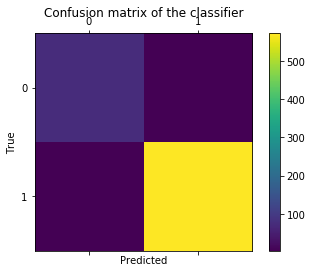

MODEL - gnb

**** RESULTS ****

F-score: 97.7586%

Mean: 94.9290%
Standard Deviation: 0.7261%

[[ 63  16]
 [ 10 567]]

Accuracy: 96.0366%


**** CONFUSION MATRIX ****



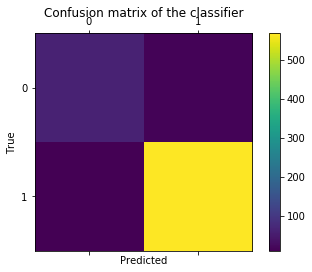

MODEL - svm1

**** RESULTS ****

F-score: 98.1132%

Mean: 94.8148%
Standard Deviation: 0.9841%

[[ 62  17]
 [  5 572]]

Accuracy: 96.6463%


**** CONFUSION MATRIX ****



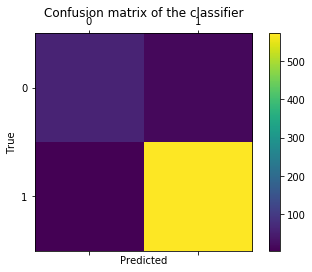

MODEL - svm2

**** RESULTS ****

F-score: 98.4536%



/usr/lib/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/lib/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/lib/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/lib/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:

Mean: 95.0057%
Standard Deviation: 0.8257%

[[ 65  14]
 [  4 573]]

Accuracy: 97.2561%


**** CONFUSION MATRIX ****



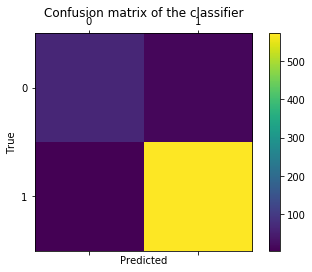

MODEL - svm3

**** RESULTS ****

F-score: 96.1106%



/usr/lib/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/lib/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/lib/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/lib/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:

Mean: 93.1746%
Standard Deviation: 1.1934%

[[ 55  24]
 [ 21 556]]

Accuracy: 93.1402%


**** CONFUSION MATRIX ****



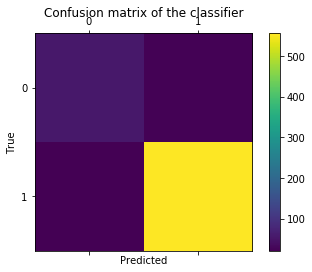

MODEL - mlp1

**** RESULTS ****

F-score: 98.8725%



/usr/lib/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Mean: 96.6450%
Standard Deviation: 0.5863%

[[ 73   6]
 [  7 570]]

Accuracy: 98.0183%


**** CONFUSION MATRIX ****



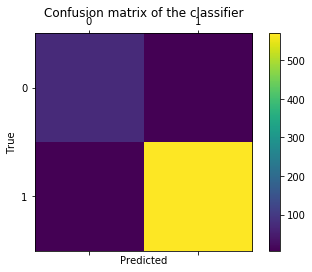

MODEL - mlp2


/usr/lib/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



**** RESULTS ****

F-score: 99.1349%



In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(features)

# Split data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# ------------------------------------------------------------------------------
# Multiple Classifiers
# ------------------------------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib
import matplotlib.pyplot as plt

clfs = {
    'knn': KNeighborsClassifier(5),
    'gnb': GaussianNB(),
    'svm1': SVC(kernel='linear'),
    'svm2': SVC(kernel='rbf'),
    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}

f1_scores = dict()
for clf_name in clfs:
    print("=" * 30)
    print("MODEL -", clf_name)
    print("=" * 30)
    clf = clfs[clf_name]
    clf.fit(X, y)

    print("")
    print('**** RESULTS ****')
    print("")
    y_pred = clf.predict(X_test)
    f1_scores[clf_name] = f1_score(y_test, y_pred)
    print("F-score: {:.4%}".format(f1_scores[clf_name]))
    print("")
    # K-Fold cross validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10)
    print("Mean: {:.4%}".format(accuracies.mean()))
    print("Standard Deviation: {:.4%}".format(accuracies.std()))
    print("")

    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("")
    accuracy = (cm[0][0] + cm[1][1]) / np.sum(cm)
    print("Accuracy: {:.4%}".format(accuracy))
    print("")

    print("")
    print('**** CONFUSION MATRIX ****')
    print("")
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()